<a href="https://colab.research.google.com/github/joaopamaral/deap_examples/blob/master/examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entendendo o Framework DEAP

## Instalando o pacote

*O Colab não possui esse pacote instalado previamente*

In [0]:
!pip install -q deap

     |████████████████████████████████| 153kB 5.2MB/s 


In [0]:
from pprint import pprint
import numpy as np
from deap import base, creator, tools, algorithms

## Tipos


O DEAP permite criar tipos customizados que serão utilizados para solução dos problemas

### Definindo Tipos - Fitness e Indivíduo

In [0]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

#### Testando

In [0]:
# checando os tipos criados
ind_base = creator.Individual()

print(type(ind_base), ind_base)
print(type(ind_base.fitness), ind_base.fitness)

<class 'deap.creator.Individual'> []
<class 'deap.creator.FitnessMin'> ()


## Inicialização


### Inicializando indivíduo

In [0]:
import random

IND_SIZE = 10

toolbox = base.Toolbox()
toolbox.register('attr_hub', random.randint, 0, 5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_hub, n=IND_SIZE)

#### Testando

In [0]:
# testando individuo
ind = toolbox.individual()

print(type(ind), ind)
print(type(ind.fitness), ind.fitness, 'Evaluated' if ind.fitness.valid else 'Not Evaluated')

<class 'deap.creator.Individual'> [5, 3, 2, 4, 2, 2, 2, 5, 0, 4]
<class 'deap.creator.FitnessMin'> () Not Evaluated


#### Exemplo permutação

In [0]:
toolbox.register('indices', random.sample, range(IND_SIZE), IND_SIZE)
toolbox.register('individual_perm', tools.initIterate, creator.Individual, toolbox.indices)

In [0]:
# testando inidividuo de permutação
ind_perm = toolbox.individual_perm()

print(type(ind_perm), ind_perm)
print(type(ind_perm.fitness), ind_perm.fitness, 'Evaluated' if ind_perm.fitness.valid else 'Not Evaluated')

<class 'deap.creator.Individual'> [7, 3, 9, 4, 0, 6, 5, 1, 8, 2]
<class 'deap.creator.FitnessMin'> () Not Evaluated


### Inicializando População

In [0]:
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#### Testando

In [0]:
# testando população
population = toolbox.population(n=15)

pprint(population)
print(type(population), type(population[0]))

[[1, 2, 4, 5, 4, 1, 0, 3, 4, 4],
 [0, 0, 5, 4, 3, 0, 5, 2, 0, 1],
 [0, 5, 1, 0, 3, 0, 3, 2, 4, 2],
 [0, 3, 0, 5, 1, 1, 2, 0, 0, 4],
 [1, 1, 1, 2, 2, 1, 0, 0, 1, 1],
 [5, 2, 4, 2, 1, 2, 2, 0, 1, 2],
 [0, 4, 0, 2, 5, 5, 3, 0, 1, 2],
 [0, 0, 0, 2, 5, 2, 2, 2, 5, 2],
 [5, 1, 0, 2, 0, 5, 4, 5, 4, 0],
 [4, 3, 1, 5, 4, 5, 1, 2, 2, 0],
 [5, 1, 2, 3, 3, 3, 2, 3, 4, 1],
 [3, 5, 5, 3, 1, 4, 4, 3, 2, 3],
 [4, 5, 5, 4, 4, 2, 1, 0, 2, 0],
 [2, 1, 4, 1, 0, 3, 0, 5, 0, 3],
 [3, 5, 3, 4, 1, 2, 1, 3, 1, 5]]
<class 'list'> <class 'deap.creator.Individual'>


## Operadores

### Cruzamento

In [0]:
ind1 = toolbox.individual()
ind2 = toolbox.individual()

print('Individuo 1: ', ind1)
print('Individuo 2: ', ind2)

def compare_ind(i1, i2):
    return ['-' if a == b else 'x' for a, b in zip(i1, i2)]

Individuo 1:  [4, 5, 5, 4, 1, 5, 4, 3, 0, 5]
Individuo 2:  [0, 2, 0, 3, 3, 1, 1, 5, 2, 3]


In [0]:
child1, child2 = map(toolbox.clone, [ind1, ind2])
child1, child2 = tools.cxOnePoint(child1, child2)
print('\n\ncxOnePoint')
print('Child1: ', child1, compare_ind(child1, ind1))
print('Child2: ', child2, compare_ind(child2, ind2))

print('\n\ncxTwoPoint')
child1, child2 = map(toolbox.clone, [ind1, ind2])
child1, child2 = tools.cxTwoPoint(child1, child2)
print('Child1: ', child1, compare_ind(child1, ind1))
print('Child2: ', child2, compare_ind(child2, ind2))

print('\n\ncxUniform')
child1, child2 = map(toolbox.clone, [ind1, ind2])
child1, child2 = tools.cxUniform(child1, child2, indpb=0.1)
print('Child1: ', child1, compare_ind(child1, ind1))
print('Child2: ', child2, compare_ind(child2, ind2))



cxOnePoint
Child1:  [4, 5, 5, 4, 1, 5, 4, 3, 0, 3] ['-', '-', '-', '-', '-', '-', '-', '-', '-', 'x']
Child2:  [0, 2, 0, 3, 3, 1, 1, 5, 2, 5] ['-', '-', '-', '-', '-', '-', '-', '-', '-', 'x']


cxTwoPoint
Child1:  [4, 5, 5, 4, 1, 5, 1, 5, 2, 5] ['-', '-', '-', '-', '-', '-', 'x', 'x', 'x', '-']
Child2:  [0, 2, 0, 3, 3, 1, 4, 3, 0, 3] ['-', '-', '-', '-', '-', '-', 'x', 'x', 'x', '-']


cxUniform
Child1:  [4, 5, 5, 4, 1, 5, 4, 3, 0, 5] ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
Child2:  [0, 2, 0, 3, 3, 1, 1, 5, 2, 3] ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-']


In [0]:
# Registrando o operador de cruzamento na toolbox
toolbox.register("mate", tools.cxTwoPoint)

### Mutação

In [0]:
ind1 = toolbox.individual()

print('Individuo 1: ', ind1)

Individuo 1:  [5, 4, 2, 5, 3, 2, 0, 3, 0, 5]


In [0]:
child1 = toolbox.clone(ind1)
child1 = tools.mutGaussian(child1, mu=2, sigma=2, indpb=0.5)[0]
print('\n\nmutGaussian')
print('Child1: ', child1, compare_ind(child1, ind1))

child1 = toolbox.clone(ind1)
child1 = tools.mutShuffleIndexes(child1, indpb=0.5)[0]
print('\n\nmutShuffleIndexes')
print('Child1: ', child1, compare_ind(child1, ind1))

child1 = toolbox.clone(ind1)
child1 = tools.mutFlipBit(child1, indpb=0.5)[0]
print('\n\nmutFlipBit')
print('Child1: ', child1, compare_ind(child1, ind1))

child1 = toolbox.clone(ind1)
child1 = tools.mutUniformInt(child1, low=0, up= 5, indpb=0.5)[0]
print('\n\nmutUniformInt')
print('Child1: ', child1, compare_ind(child1, ind1))



mutGaussian
Child1:  [8.754307441303391, 5.774344245835431, 2, 5, 2.7533913567664277, 2, 0, 5.274820041066986, 0, 2.722430682741396] ['x', 'x', '-', '-', 'x', '-', '-', 'x', '-', 'x']


mutShuffleIndexes
Child1:  [5, 4, 3, 5, 0, 2, 0, 3, 2, 5] ['-', '-', 'x', '-', 'x', '-', '-', '-', 'x', '-']


mutFlipBit
Child1:  [5, 4, 2, 5, 0, 2, 1, 0, 1, 5] ['-', '-', '-', '-', 'x', '-', 'x', 'x', 'x', '-']


mutUniformInt
Child1:  [5, 3, 5, 1, 3, 2, 0, 3, 0, 5] ['-', 'x', 'x', 'x', '-', '-', '-', '-', '-', '-']


In [0]:
# Registrando o operador de cruzamento na toolbox
toolbox.register("mutate", tools.mutUniformInt, low=0, up=5, indpb=0.1)

## Avaliação

In [0]:
ind1 = toolbox.individual()
print('Individuo 1: ', ind1)

def my_evaluation1(individual):
    return sum(individual), 

print(f'\nEvaluated Fitness: {ind1.fitness.valid}')
ind1.fitness.values = my_evaluation1(ind1)
print(f'Evaluated Fitness: {ind1.fitness.valid} | Value: {ind1.fitness}')

Individuo 1:  [5, 1, 1, 2, 5, 5, 1, 2, 3, 0]

Evaluated Fitness: False
Evaluated Fitness: True | Value: (25.0,)


In [0]:
# Registrando o operador de avaliação na toolbox
toolbox.register("evaluate", my_evaluation1)

## Seleção

In [0]:
population = toolbox.population(n=15)
for individual in population:
    individual.fitness.values = my_evaluation1(individual)

def print_pop_fit(pop):
    pprint([[individual, individual.fitness.values] for individual in pop])


print('População:')
print_pop_fit(population)

print('\n\nselTournament:')
print_pop_fit(tools.selTournament(population, k=5, tournsize=3))

print('\n\nselRoulette:')
print_pop_fit(tools.selRoulette(population, k=5))

print('\n\nselBest:')
print_pop_fit(tools.selBest(population, k=5))

print('\n\nselWorst:')
print_pop_fit(tools.selWorst(population, k=5))

População:
[[[0, 4, 0, 2, 0, 3, 1, 0, 0, 5], (15.0,)],
 [[5, 4, 0, 1, 1, 3, 3, 0, 3, 2], (22.0,)],
 [[3, 5, 1, 5, 0, 2, 0, 0, 1, 5], (22.0,)],
 [[2, 2, 3, 1, 3, 2, 5, 3, 1, 1], (23.0,)],
 [[0, 4, 5, 4, 3, 3, 5, 5, 1, 2], (32.0,)],
 [[0, 1, 1, 5, 4, 1, 5, 5, 1, 3], (26.0,)],
 [[2, 4, 0, 4, 3, 4, 4, 0, 1, 2], (24.0,)],
 [[1, 3, 2, 1, 0, 5, 4, 0, 4, 4], (24.0,)],
 [[3, 1, 4, 2, 1, 0, 5, 1, 3, 5], (25.0,)],
 [[3, 3, 1, 2, 3, 1, 0, 2, 5, 1], (21.0,)],
 [[2, 4, 3, 1, 2, 4, 3, 2, 2, 3], (26.0,)],
 [[0, 3, 4, 4, 4, 5, 4, 5, 3, 4], (36.0,)],
 [[3, 4, 0, 0, 5, 5, 0, 4, 5, 0], (26.0,)],
 [[0, 5, 4, 4, 5, 3, 4, 4, 5, 2], (36.0,)],
 [[3, 2, 1, 4, 0, 4, 0, 3, 5, 0], (22.0,)]]


selTournament:
[[[0, 4, 0, 2, 0, 3, 1, 0, 0, 5], (15.0,)],
 [[1, 3, 2, 1, 0, 5, 4, 0, 4, 4], (24.0,)],
 [[2, 4, 0, 4, 3, 4, 4, 0, 1, 2], (24.0,)],
 [[3, 2, 1, 4, 0, 4, 0, 3, 5, 0], (22.0,)],
 [[3, 2, 1, 4, 0, 4, 0, 3, 5, 0], (22.0,)]]


selRoulette:
[[[0, 1, 1, 5, 4, 1, 5, 5, 1, 3], (26.0,)],
 [[0, 5, 4, 4, 5, 3, 4, 4, 5, 2],

In [0]:
# Registrando o operador de seleção na toolbox
toolbox.register("select", tools.selTournament, tournsize=3)

## Variações

In [0]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=5, indpb=0.1)

population = toolbox.population(n=15)
for i in population:
    i.fitness.values = my_evaluation1(i)

offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.1)

print('\tPopulação\t\t|\t\tFilhos\t\t|\tMudanças')
pprint([[p1, o1, ' '.join(['x' if z1 != z2 else '-' for z1, z2 in zip(p1, o1)]), o1.fitness.valid] 
        for p1, o1 in zip(population, offspring)], width=100)

	População		|		Filhos		|	Mudanças
[[[4, 1, 4, 5, 2, 1, 2, 0, 3, 4], [4, 1, 4, 5, 2, 0, 5, 0, 3, 4], '- - - - - x x - - -', False],
 [[3, 3, 5, 5, 1, 0, 5, 2, 2, 4], [3, 3, 5, 5, 1, 1, 2, 2, 2, 4], '- - - - - x x - - -', False],
 [[4, 4, 3, 0, 5, 3, 3, 0, 1, 4], [4, 4, 3, 0, 5, 3, 3, 0, 1, 4], '- - - - - - - - - -', True],
 [[2, 2, 0, 0, 0, 2, 1, 2, 2, 1], [2, 2, 0, 0, 0, 2, 1, 2, 2, 1], '- - - - - - - - - -', True],
 [[5, 1, 2, 3, 5, 4, 4, 5, 3, 4], [5, 1, 1, 3, 5, 4, 4, 5, 3, 4], '- - x - - - - - - -', False],
 [[2, 0, 1, 0, 0, 4, 1, 4, 2, 2], [2, 0, 2, 0, 0, 4, 1, 4, 2, 2], '- - x - - - - - - -', False],
 [[0, 5, 1, 2, 3, 0, 4, 5, 5, 0], [0, 5, 1, 2, 4, 0, 0, 0, 0, 1], '- - - - x - x x x x', False],
 [[0, 2, 0, 1, 4, 0, 0, 0, 0, 1], [0, 2, 0, 1, 3, 0, 4, 5, 5, 0], '- - - - x - x x x x', False],
 [[2, 3, 5, 1, 0, 2, 1, 1, 1, 3], [2, 3, 5, 1, 0, 2, 1, 1, 1, 3], '- - - - - - - - - -', True],
 [[3, 0, 2, 5, 2, 5, 1, 5, 0, 0], [3, 0, 2, 5, 2, 5, 1, 5, 0, 0], '- - - - - - - - - -', True],


## Algoritmos

In [0]:
population = toolbox.population(n=50)

def my_evaluation1(individual):
    return sum(individual), 

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", my_evaluation1)


stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)


pop, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.1, ngen=50, stats=stats, verbose=False)

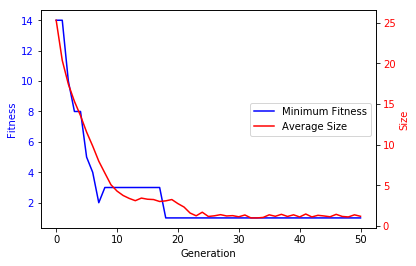

In [0]:
gen, fit_mins, size_avgs = logbook.select("gen", "min", "avg")

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
for tl in ax1.get_yticklabels():
    tl.set_color("b")

ax2 = ax1.twinx()
line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
ax2.set_ylabel("Size", color="r")
for tl in ax2.get_yticklabels():
    tl.set_color("r")

lns = line1 + line2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center right")

plt.show()